In [1]:
from DLC_predict import predict_label, pre_matt

Load template worm and test worm

In [2]:
temp_f = '../Data/Example/template.data'
test_f = '../Data/Example/test.data'
temp = pre_matt(temp_f)  #load python dictinary from a pickle file.
test = pre_matt(test_f)
# template worm contains pts, color(can be None) and label
temp_pos = temp['pts']
temp_label = temp['name']
temp_color = temp['color']
# test worm contains pts, color(can be None)
test_pos = test['pts']
test_color = test['color']

In [3]:
# the model can works with/without gpu(cuda=True/False)
test_label, candidate_list = predict_label(temp_pos, temp_label, test_pos, temp_color, 
                                           test_color, cuda=False)

test_label saves the label assigned with our fDLC model together with the confidence for that assignment.

In [4]:
test_label

[('AMSOR', 0.9886386038635081),
 ('I1L', 0.9990559852157224),
 ('I1R', 0.9999968160027876),
 ('AMSOL', 0.9993192814274131),
 ('', 0.000950453621101637),
 ('', 0.00031777461915899734),
 ('', 6.803018447998584e-08),
 ('IL2VL', 0.999999953332666),
 ('I2L', 0.9999993049880918),
 ('', 5.098628437662275e-05),
 ('', 0.0005960404170222677),
 ('I3', 0.05599582882233443),
 ('I2R', 0.999999987245405),
 ('IL1DL', 5.128908670580353e-10),
 ('IL2DR', 0.9999999911893411),
 ('', 0),
 ('IL2DL', 0.9994645723716218),
 ('M3L', 0.9999999888274548),
 ('M3R', 0.999999999930488),
 ('IL2VR', 5.121759319255254e-05),
 ('', 0),
 ('URADL', 0.9999834838034579),
 ('IL1VL', 0.9978653259807598),
 ('OLLL', 0.6506673465756723),
 ('OLLR', 0.999999998104272),
 ('IL1VR', 0.9985372548964196),
 ('URYDL', 0.9999339815386739),
 ('URYDR', 0.9978490891651229),
 ('URBL', 0.9999999662560165),
 ('IL1DR', 0.9704573817702578),
 ('URYVL', 0.9997631418399706),
 ('OLQDR', 0.9999999999851947),
 ('URBR', 1.6334392347062848e-06),
 ('URAVR',

The candidate_list gives the top 5 labels for the neuron together with their confidence.

In [5]:
candidate_list

[[('AMSOR', 0.9886386038635081),
  ('AMSOL', 0.01129991931909299),
  ('OLQDR', 3.775683539561052e-05),
  ('ASGR', 2.0884678793930585e-05),
  ('SMDVR', 2.5633661138687395e-06)],
 [('I1L', 0.9990559852157224),
  ('I1R', 0.0009406794472218193),
  ('IL2VL', 3.258599627221878e-06),
  ('', 3.652745494037142e-08),
  ('AMSOR', 3.2396666832872987e-08)],
 [('I1R', 0.9999968160027876),
  ('I2R', 3.160848758903855e-06),
  ('AMSOR', 1.9230048435365323e-08),
  ('I1L', 2.510472705433938e-09),
  ('CEPVR', 9.64627958928132e-10)],
 [('AMSOL', 0.9993192814274131),
  ('AMSOR', 0.0006805452267331369),
  ('IL2VL', 1.0319656355162351e-07),
  ('URXL', 2.993247351693983e-08),
  ('', 2.988562364080706e-08)],
 [('', 0.9943575533935124),
  ('', 0.0035761169806927317),
  ('', 0.000950453621101637),
  ('RMER', 0.0006249721149120506),
  ('', 0.0004907450221152548)],
 [('', 0.9875515084582136),
  ('', 0.011694552252195331),
  ('I1R', 0.0004296761335296868),
  ('', 0.00031777461915899734),
  ('', 3.978411629979712e-06

Plot template worm with Label

Text(0.5, 0.92, 'template worm')

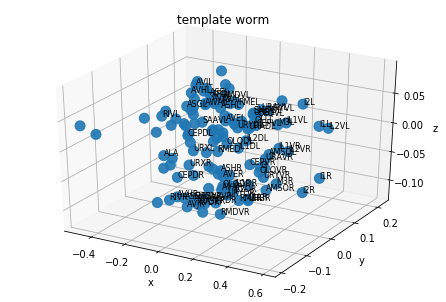

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
sc = ax.scatter(temp_pos[:, 0], temp_pos[:, 1], temp_pos[:, 2], s=100, alpha=0.9, marker='o')
for i in range(len(temp_pos)):
    ax.text(temp_pos[i, 0], temp_pos[i, 1], temp_pos[i, 2], temp_label[i], fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('template worm')


Plot test worm with label predicted by model

Text(0.5, 0.92, 'test worm')

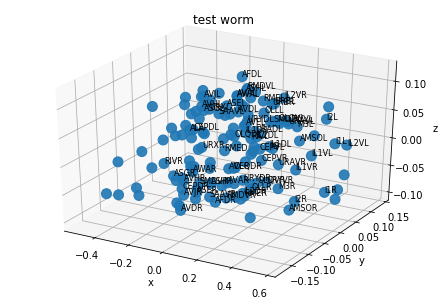

In [7]:
fig = plt.figure()
ax = Axes3D(fig)
sc = ax.scatter(test_pos[:, 0], test_pos[:, 1], test_pos[:, 2], s=100, alpha=0.9, marker='o')
for i in range(len(test_pos)):
    ax.text(test_pos[i, 0], test_pos[i, 1], test_pos[i, 2], test_label[i][0], fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('test worm')